In [1]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

## Loading Dataset

In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cleveland.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


creating one hot encoding for categorical data

In [6]:
df = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'], prefix = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [7]:
X = df.drop('target', axis = 1)
y = df.target
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
# X_train

(212, 30)
(91, 30)


carrying out StandScaler and PCA on data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
pipe = Pipeline([
        ('stdScaler', StandardScaler()),
        ('PCA', PCA(.95)),
        ])

featureScalable = ['trestbps', 'chol', 'thalach', 'oldpeak']
pipe.fit(X_train[featureScalable])
X_train[featureScalable] = pipe.transform(X_train[featureScalable])
X_test[featureScalable] = pipe.transform(X_test[featureScalable])
pickle.dump(pipe,open('pipe.pkl','wb')) ## Storing data using pickle for data trasnsformation 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [10]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
225,70,1.502801,-1.511056,-0.812326,0.172463,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
152,64,0.671978,0.708042,-2.173743,-0.343843,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
228,59,0.615280,1.757876,-1.711785,-0.524492,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
201,60,0.949985,-0.474623,0.767222,0.809583,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
52,62,0.348249,-0.484533,0.063240,0.346187,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,67,-0.186404,-0.290440,2.244777,-0.717094,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
293,67,0.307700,-0.025255,-1.364958,-0.253018,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
76,51,0.055272,-0.175683,0.285198,1.323981,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
272,67,1.577945,-1.686487,1.371790,-2.325621,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [11]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
137,62,-0.573382,-0.607496,-0.259979,-0.895349,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
106,69,0.760254,0.300644,-1.420330,-1.312601,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
284,61,0.800730,-0.775980,-0.527475,0.132661,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
44,39,-0.825276,2.017790,-0.277433,0.183260,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
139,64,0.645742,-0.408672,0.704281,-1.868707,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,-0.320532,0.086251,-0.106385,-0.804335,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
192,54,0.512125,-1.801095,0.471637,-0.783851,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
117,56,-0.459627,-1.020175,0.008451,0.977547,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
47,47,-0.484355,0.598050,-0.469908,-0.521441,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [12]:

from sklearn.metrics import accuracy_score

## Comparing different Algorithms

In [13]:
from sklearn.linear_model import LogisticRegression
linClf = LogisticRegression(solver='liblinear')
linClf.fit(X_train, y_train)

trainPred = linClf.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = linClf.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

In [14]:
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385


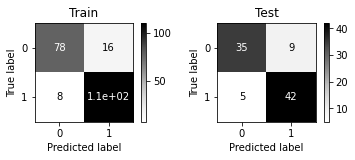

In [15]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(linClf, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(linClf, X_test, y_test, cmap = 'Greys', ax=ax2)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knnClf = KNeighborsClassifier(n_neighbors=10)
knnClf.fit(X_train, y_train)

trainPred = knnClf.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = knnClf.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

In [17]:
results_df = results_df.append(pd.DataFrame(data=[["KNN", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385
1,KNN,81.603774,76.923077


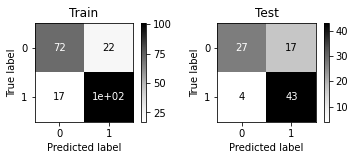

In [18]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(knnClf, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(knnClf, X_test, y_test, cmap = 'Greys', ax=ax2)


In [19]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state= 42)
svm_clf.fit(X_train, y_train)

trainPred = svm_clf.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = svm_clf.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

results_df = results_df.append(pd.DataFrame(data=[["SVM", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)
results_df

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385
1,KNN,81.603774,76.923077
2,SVM,88.679245,84.615385


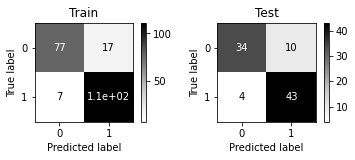

In [20]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(svm_clf, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(svm_clf, X_test, y_test, cmap = 'Greys', ax=ax2)

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

trainPred = tree_clf.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = tree_clf.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

results_df = results_df.append(pd.DataFrame(data=[["Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385
1,KNN,81.603774,76.923077
2,SVM,88.679245,84.615385
3,Decision Tree,100.000000,70.329670


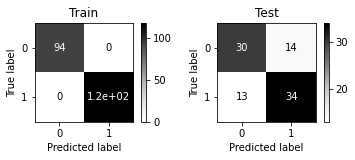

In [22]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(tree_clf, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(tree_clf, X_test, y_test, cmap = 'Greys', ax=ax2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth= 5)
rf_clf.fit(X_train, y_train)

trainPred = rf_clf.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = rf_clf.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

results_df = results_df.append(pd.DataFrame(data=[["Random Forest", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385
1,KNN,81.603774,76.923077
2,SVM,88.679245,84.615385
3,Decision Tree,100.000000,70.329670
4,Random Forest,94.339623,84.615385


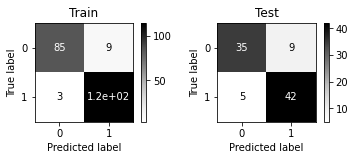

In [24]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(rf_clf, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(rf_clf, X_test, y_test, cmap = 'Greys', ax=ax2)

In [25]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

trainPred = xgb_clf.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = xgb_clf.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

results_df = results_df.append(pd.DataFrame(data=[["XGBoost", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385
1,KNN,81.603774,76.923077
2,SVM,88.679245,84.615385
3,Decision Tree,100.000000,70.329670
4,Random Forest,94.339623,84.615385
5,XGBoost,99.528302,83.516484


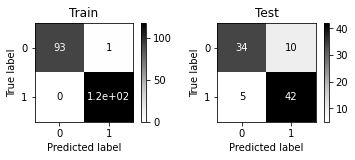

In [26]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(xgb_clf, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap = 'Greys', ax=ax2)

In [27]:

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

trainPred = nb_clf.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = nb_clf.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

results_df = results_df.append(pd.DataFrame(data=[["Naive Bayes", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)


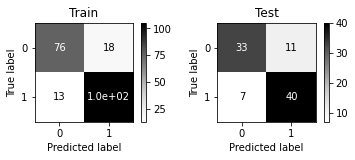

In [28]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(nb_clf, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(nb_clf, X_test, y_test, cmap = 'Greys', ax=ax2)

In [29]:
results_df.sort_values('Testing Accuracy %', ascending= False)

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385
2,SVM,88.679245,84.615385
4,Random Forest,94.339623,84.615385
5,XGBoost,99.528302,83.516484
6,Naive Bayes,85.377358,80.219780
1,KNN,81.603774,76.923077
3,Decision Tree,100.000000,70.329670


In [30]:
from sklearn.ensemble import StackingClassifier

estimators = [
              ('svr', LinearSVC(random_state= 42)),
              ('rf', RandomForestClassifier(n_estimators=200, random_state=42,max_depth= 5)),
               ('lin', LogisticRegression(solver='liblinear'))
             ]

stack = StackingClassifier(estimators = estimators,final_estimator=LogisticRegression(solver='liblinear'))
stack.fit(X_train,y_train)
trainPred = stack.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = stack.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

results_df = results_df.append(pd.DataFrame(data=[["Stacked", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

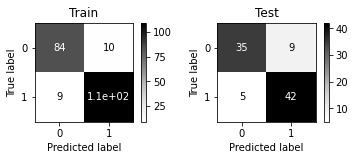

In [31]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(stack, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(stack, X_test, y_test, cmap = 'Greys', ax=ax2)

In [32]:
results_df.sort_values('Testing Accuracy %',ascending= False)

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.679245,84.615385
2,SVM,88.679245,84.615385
4,Random Forest,94.339623,84.615385
7,Stacked,91.037736,84.615385
5,XGBoost,99.528302,83.516484
6,Naive Bayes,85.377358,80.219780
1,KNN,81.603774,76.923077
3,Decision Tree,100.000000,70.329670


In [33]:

estimators = [
              ('svr', LinearSVC(random_state= 42)),
              ('knn', KNeighborsClassifier(n_neighbors=10)),
               ('lin', LogisticRegression(solver='liblinear'))
             ]

stack = StackingClassifier(estimators = estimators,final_estimator=LogisticRegression(solver='liblinear'))
stack.fit(X_train,y_train)
trainPred = stack.predict(X_train)
train_score = accuracy_score(y_train, trainPred) * 100

testPred = stack.predict(X_test)
test_score = accuracy_score(y_test, testPred) * 100

results_df = results_df.append(pd.DataFrame(data=[["Stacked KNN", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']),ignore_index= True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

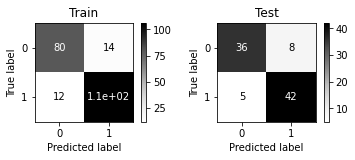

In [34]:
ax1 = plt.subplot(221)
plt.title('Train')
plot_confusion_matrix(stack, X_train, y_train, cmap = 'Greys' , ax=ax1)
ax2 = plt.subplot(222)
plt.title('Test')
plot_confusion_matrix(stack, X_test, y_test, cmap = 'Greys', ax=ax2)

In [35]:
results_df.sort_values('Testing Accuracy %',ascending= False)

,Model,Training Accuracy %,Testing Accuracy %
8,Stacked KNN,87.735849,85.714286
0,Logistic Regression,88.679245,84.615385
2,SVM,88.679245,84.615385
4,Random Forest,94.339623,84.615385
7,Stacked,91.037736,84.615385
5,XGBoost,99.528302,83.516484
6,Naive Bayes,85.377358,80.219780
1,KNN,81.603774,76.923077
3,Decision Tree,100.000000,70.329670


##Creating model to export

In [36]:
X = df.drop('target', axis = 1)
y = df.target

In [37]:
estimators = [
              ('svm', LinearSVC(random_state= 42)),
              ('knn', KNeighborsClassifier(n_neighbors=10)),
               ('lin', LogisticRegression(solver='liblinear'))
             ]

finalmodel = StackingClassifier(estimators = estimators,final_estimator=LogisticRegression(solver='liblinear'))
finalmodel.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

StackingClassifier(cv=None,
                   estimators=[('svm',
                                LinearSVC(C=1.0, class_weight=None, dual=True,
                                          fit_intercept=True,
                                          intercept_scaling=1,
                                          loss='squared_hinge', max_iter=1000,
                                          multi_class='ovr', penalty='l2',
                                          random_state=42, tol=0.0001,
                                          verbose=0)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neigh

In [38]:
pickle.dump(finalmodel,open('model.pkl','wb'))

In [39]:
Hrtmodel = pickle.load(open('/content/model.pkl','rb'))

In [40]:
import numpy as np
values = (df.iloc[0].drop('target')).to_numpy().astype(float)
print(values)

[ 63.  145.  233.  150.    2.3   0.    1.    0.    0.    0.    1.    0.
   1.    1.    0.    0.    1.    0.    1.    0.    0.    1.    0.    0.
   0.    0.    0.    1.    0.    0. ]


In [41]:
resultHRT = Hrtmodel.predict([values])
print(resultHRT)

[1]


In [42]:
# value2 = values.tolist()
# print (value2)

In [43]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# stdScaler = StandardScaler()
# PCA = PCA(.95)

# resu= stdScaler.fit_transform([[145]])
# resu = PCA.fit_transform([[145]])
# resu

In [44]:
# stdscalrpipe = pickle.load(open('/content/pipe.pkl','rb'))

In [45]:
a= float(1546)

In [46]:
a

1546.0